In [3]:
cd C:\Users\Luce\Google Drive\Big_Data\house prediction

C:\Users\Luce\Google Drive\Big_Data\house prediction


In [5]:
#X1. CRIM: per capita crime rate by town 
#X2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
#X3. INDUS: proportion of non-retail business acres per town 
#X4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
#X5. NOX: nitric oxides concentration (parts per 10 million) 
#X6. RM: average number of rooms per dwelling 
#X7. AGE: proportion of owner-occupied units built prior to 1940 
#X8. DIS: weighted distances to five Boston employment centres 
#X9. RAD: index of accessibility to radial highways 
#X10. TAX: full-value property-tax rate per $10,000 
#X11. PTRATIO: pupil-teacher ratio by town 
#X12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
#X13. LSTAT: % lower status of the population 
#Y. MEDV: Median value of owner-occupied homes in $1000's

In [82]:

# Importando os módulos necessários
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [53]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.
from sklearn.datasets import load_boston
boston = load_boston()


In [54]:
# Verificando o tipo da variável boston
type(boston)

sklearn.datasets.base.Bunch

In [56]:

# Visualizando o shape do dataset, neste caso 506 instâncias (linhas) e 13 atributos (colunas)
boston.data.shape

(506L, 13L)

In [58]:
# Descrição do Dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [140]:
# Convertendo o dataset em um DataFrame pandas
df = pd.DataFrame(boston.data)


In [141]:
# Convertendo o título das colunas
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [65]:
# boston.target é uma array com o preço das casas 
boston.target

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

In [67]:
# Adicionando o preço da casa ao DataFrame
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [70]:
#Prevendo o preço das casas em Boston
#Y - variável dependente (preço das casas em Boston)
#X - variáveis independentes ou explanatórias (todas as outras caracterísricas da casa)
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression

In [77]:
# Não queremos o preço da casa como variável dependente
# Como se observa abaixo o ítem 'prices' foi removido
X = df.drop('PRICE', axis = 1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [79]:
# Definindo Y
Y = df.PRICE
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

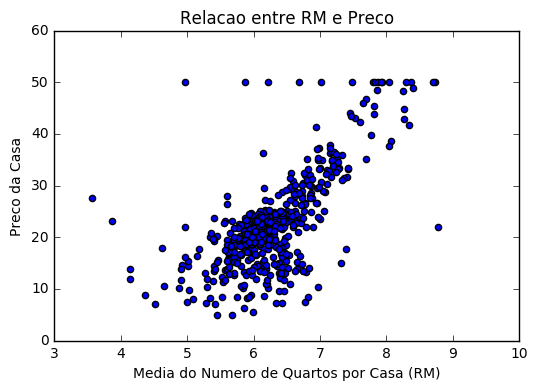

In [139]:
plt.scatter(df.RM, Y)

plt.xlabel('Media do Numero de Quartos por Casa (RM)')
plt.ylabel('Preco da Casa')
plt.title('Relacao entre RM e Preco')
plt.show()

In [90]:
# Criando o objeto de regressão linear
regr = LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Tipo do objeto
type(regr)

sklearn.linear_model.base.LinearRegression

In [93]:
# Treinando o modelo
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
# Coeficientes
print("Coeficiente: ", regr.intercept_)
print("Número de Coeficiente: ", len(regr.coef_))

('Coeficiente: ', 36.491103280361116)
('N\xc3\xbamero de Coeficiente: ', 13)


In [96]:
# Prevendo o preço da casa
regr.predict(X)

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,
        27.94288232,  25.25940048,  23.00433994,  19.5347558 ,
        11.51696539,  18.91981483,  18.9958266 ,  21.58970854,
        20.90534851,  19.55535931,  19.2837957 ,  19.30000174,
        20.52889993,  16.9096749 ,  16.17067411,  18.40781636,
        12.52040454,  17.67104565,  15.82934891,  13.80368317,
        15.67708138,  13.3791645 ,  15.46258829,  14.69863607,
        19.54518512,  20.87309945,  11.44806825,  18.05900412,
         8.78841666,  14.27882319,  13.69097132,  23.81755469,
        22.34216285,  23.11123204,  22.91494157,  31.35826216,
        34.21485385,  28.0207132 ,  25.20646572,  24.61192851,
        22.94438953,  22.10150945,  20.42467417,  18.03614022,
         9.10176198,  17.20856571,  21.28259372,  23.97621248,
        27.65853521,  24.0521088 ,  15.35989132,  31.14817003,
        24.85878746,  33.11017111,  21.77458036,  21.08526739,
        17.87203538,  18.50881381,  23.9879809 ,  22.54

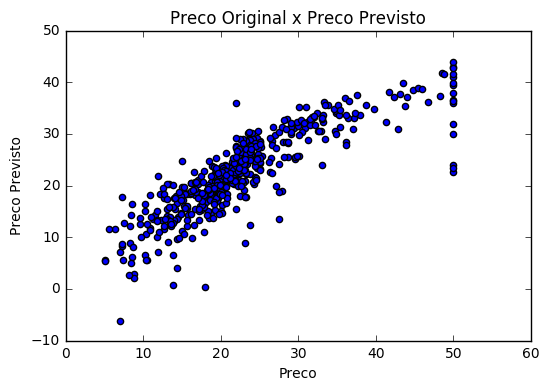

In [135]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preco")
plt.ylabel("Preco Previsto")
plt.title("Preco Original x Preco Previsto")
plt.show()



In [101]:
# Vamos calcular o MSE (Mean Squared Error)
mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.8977792177


In [103]:
# Aplicando regressõa linear para apenas uma variável e calculando o MSE
regr = LinearRegression()
regr.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['PTRATIO']])) ** 2)
print(mse2)

62.6522000138


In [ ]:
Na prática, você não vai implementar regressão linear em todo o dataset. 
Você vai dividir o dataset em datasets de treino e de teste. 
Assim, você treina seu modelo nos dados de treino e 
depois verifica como o modelo se comporta nos seus dados de teste. 
Vejamos:

In [107]:
# Dividindo X em dados de treino e de teste
X_treino = X[:-50]
X_teste = X[-50:]

# Dividindo Y em dados de treino e de teste
Y_treino = df.PRICE[:-50]
Y_teste = df.PRICE[-50:]

# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

((456, 13), (50, 13), (456L,), (50L,))


In [108]:
Podemos criar nossos datasets de treino de forma manual, mas claro este não é método correto. 
Vamos então dividir os datasets randomicamente. 
O Scikit-Learn provê uma função chamada train_test_split() para isso.

SyntaxError: invalid syntax (<ipython-input-108-e9b993719507>, line 1)

In [110]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = sklearn.cross_validation.train_test_split(X, df.PRICE, test_size = 0.33, random_state = 5)

In [112]:
# Imprimindo o shape dos datasets
print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

((339, 13), (167, 13), (339L,), (167L,))


In [114]:
# Construindo um modelo de regressão
regr = LinearRegression()

In [116]:
# Treinando o modelo
regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
# Definindo os dados de treino e teste
pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

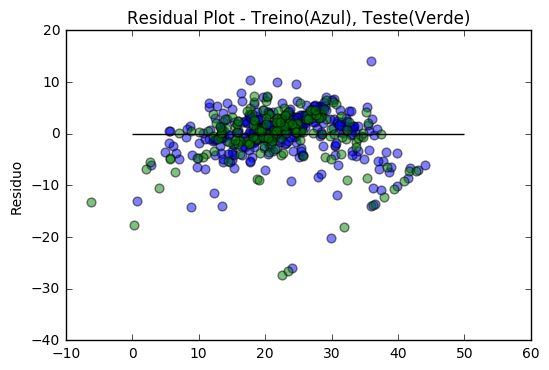

In [142]:
# Comparando preços originais x preços previstos
plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel('Residuo')
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

In [143]:
Prevendo o Preço da Pizza
Suponha que você queira prever o preço da pizza. Para isso, vamos criar um modelo de regressão linear para prever o preço da pizza, baseado em um atributo da pizza que podemos observar. Vamos modelar a relação entre o tamanho (diâmetro) de uma pizza e seu preço. Escreveremos então um programa com sckit-learn, que prevê o preço da pizza dado seu tamanho.
O conjunto de técnicas de regressão é muito provavelmente o mais utilizado em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma ou mais variáveis potencialmente preditoras, sem que haja, entretanto uma obrigatória relação de causa e efeito.
É de fundamental importância que o pesquisador seja bastante cuidadoso e criterioso ao interpretar os resultados de uma modelagem de regressão. A existência de um modelo de regressão não significa que ocorra, obrigatoriamente, relação de causa e efeito entre as variáveis consideradas.

SyntaxError: invalid syntax (<ipython-input-143-9acd4e9aedcf>, line 1)

In [145]:
# Importando Matplotlib e Numpy
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [146]:
Vamos supor que você registrou o tamanho e preço de pizzas que você comeu nos últimos meses com a sua família.¶

SyntaxError: invalid syntax (<ipython-input-146-75e75d07283e>, line 1)

In [148]:
# Diâmetros (cm)
Diametros = [[7], [10], [15], [30], [45]]

# Preços (R$)
Precos = [[8], [11], [16], [38.5], [52]]
[Diametros, Precos]

[[[7], [10], [15], [30], [45]], [[8], [11], [16], [38.5], [52]]]

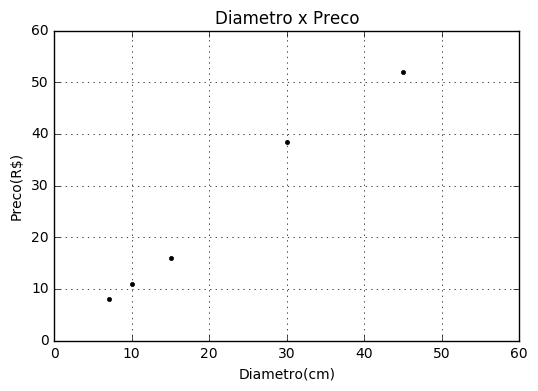

In [152]:
plt.figure()
plt.xlabel('Diametro(cm)')
plt.ylabel('Preco(R$)')
plt.title('Diametro x Preco')
plt.plot(Diametros, Precos, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

In [154]:
# Importando o módulo de Regressão Linear do scikit-learn
from sklearn.linear_model import LinearRegression

In [156]:
# Preparando os dados de treino

# Vamos chamar de X os dados de diâmetro da Pizza.
X = [[7], [10], [15], [30], [45]]

# Vamos chamar de Y os dados de preço da Pizza.
Y = [[8], [11], [16], [38.5], [52]]

In [158]:
# Criando o modelo
modelo = LinearRegression()

In [160]:
type(modelo)

sklearn.linear_model.base.LinearRegression

In [162]:
# Treinando o modelo
modelo.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
# Prevendo o preço de uma pizza de 20 cm de diâmetro usando Machine Learning
print("Uma pizza de 25 cm de diâmetro deve custar: R$%.2f" % modelo.predict([25][0]))

Uma pizza de 25 cm de diâmetro deve custar: R$29.44


In [184]:
for k in np.arange(0, 3):
    print(['Preco de uma pizza com',k,'cm',% modelo.predict([k][0])])



SyntaxError: invalid syntax (<ipython-input-184-7aea16400816>, line 2)